In [1]:
import numpy as np
import jax
import jax.numpy as jnp
from jax import lax
import argparse
import sys
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Add the path to the directory containing the file
sys.path.append(os.path.abspath('../benchmarking/'))
from utils import *
from gap_search_via_aln_benchmark import *

In [2]:
data_path = "/cluster/tufts/pettilab/shared/structure_comparison_data"
train_pairs_path = f"{data_path}/protein_data/pairs_training.csv"
train_list_path = f"{data_path}/protein_data/train.csv"
coord_path = f"{data_path}/protein_data/allCACoord.npz"
val_path = f"{data_path}/protein_data/given_validation_alignments.npz"
lddts_given_path =f"{data_path}/protein_data/pairs_validation_lddts.csv"

In [3]:
oh_3Di_path = f"{data_path}/alphabets/3Di.npz"
blosum_3Di_path = f"{data_path}/alphabets/3Di_blosum.npy"
oh_3Dn_path = f"{data_path}/alphabets/graph_clusters.npz"
blosum_3Dn_path = f"{data_path}/alphabets/graph_clusters_blosum.npy"

In [4]:
data_3Di = get_data(oh_3Di_path, blosum_3Di_path, coord_path, val_path, lddts_given_path)
data_3Dn = get_data(oh_3Dn_path, blosum_3Dn_path, coord_path, val_path, lddts_given_path)

in hot_d but not coord_d:
set()
in coord_d but not hot_d:
{'d1o7d.3', 'd1o7d.2'}
all keys match
in hot_d but not coord_d:
set()
in coord_d but not hot_d:
{'d1o7d.3', 'd1o7d.2'}
all keys match


In [5]:
params = {}
params["gap_extend"] = None
params["gap_open"] = None
params["temp"] = 1e-3 # do not change
params["soft_aln_thresh"]=.5 # do not change
params["use_two"]= False
params["w1"] = None
params["w2"] = None
params["blurry"] = None
params["jaccard_blosum"] = None
params["batch_size"] = 200 # make smaller if running out of mem

In [6]:
params["gap_extend"]=-1
params["gap_open"]=-10
lddts_3Di = run_in_batches(params, data_3Di)

finished batch, 0 done
finished batch, 200 done
finished batch, 400 done
finished batch, 600 done
finished batch, 800 done
finished batch, 1000 done
finished batch, 1200 done
finished batch, 1400 done


In [7]:
params["gap_extend"]=-0.5
params["gap_open"]=-10
lddts_3Dn = run_in_batches(params, data_3Dn)

finished batch, 0 done
finished batch, 200 done
finished batch, 400 done
finished batch, 600 done
finished batch, 800 done
finished batch, 1000 done
finished batch, 1200 done
finished batch, 1400 done


In [25]:
diffs={}
for i in range(len(data_3Di["pairs"])):
    diffs[data_3Di["pairs"][i]] = (lddts_3Di[i]-lddts_3Dn[i]).item()

top_three_keys = sorted(diffs, key=diffs.get, reverse=True)[:3]

# Find keys of the three smallest values
smallest_three_keys = sorted(diffs, key=diffs.get)[:3]

# Print the results
print("Keys of the top three values:", top_three_keys)
print("Keys of the smallest three values:", smallest_three_keys)

idx = [data_3Di["pairs"].index(_) for _ in top_three_keys+smallest_three_keys ]

Keys of the top three values: [('d1ifca_', 'd1vpra1'), ('d1sg1x4', 'd1d4va2'), ('d1lfoa_', 'd1vpra1')]
Keys of the smallest three values: [('d3beca2', 'd1w79a1'), ('d1es5a_', 'd1w79a1'), ('d1sg1x2', 'd1exta2')]


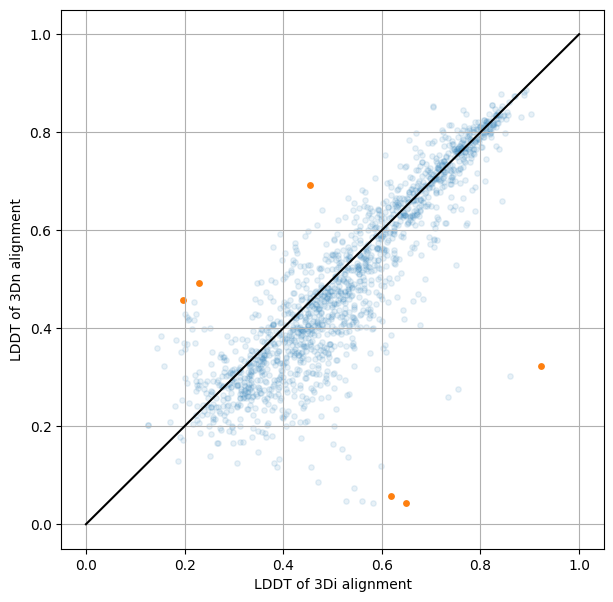

In [28]:
plt.figure(figsize=(7, 7))
plt.scatter(lddts_3Di, lddts_3Dn,alpha = .1, s =15)
plt.scatter([lddts_3Di[_] for _ in idx], [lddts_3Dn[_] for _ in idx] ,alpha = 1, s =15)

plt.xlabel("LDDT of 3Di alignment")
plt.ylabel("LDDT of 3Dn alignment")
plt.plot([0,1],[0,1], color = 'black')
plt.grid()
plt.show()